#**Fase 2**
Ana Vivar Rojas     A01798128

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t0 = 0.0     # Tiempo de inicio
tf = 30.0    # Tiempo final
h = 0.01     # Paso
x0 = 20      # Condición inicial
y0 = 20 

a = 1
b = 0.02
c = 1
d = 0.01

####*Ecuaciones de Lotka-Volterra*
$\dot{x}=ax-bxy$\
$\dot{y}=-cy+dxy$

###**Método de Eulero**

$x(t+\Delta t)=x(t)+\frac{dx}{dt}\Delta t$\
$y(t+\Delta t)=y(t)+\frac{dy}{dt}\Delta t$

In [ ]:
nt = int((tf-t0)/h) #número de pasos
t = np.arange(nt+1)*h
x = np.empty(nt+1)
y = np.empty(nt+1)

x[0] = x0
y[0] = y0

for step in range(nt):
  x[step+1] = x[step]+(a*x[step]-b*x[step]*y[step])*h
  y[step+1] = y[step]+(-c*y[step]+d*x[step]*y[step])*h

In [ ]:
print('Función aproximada de presas:', x)
print('Función aproximada de depredadores:', y)

Función aproximada de presas: [20.         20.12       20.24136384 ...  9.79170243  9.82247278
  9.85394745]
Función aproximada de depredadores: [20.         19.84       19.68151808 ... 34.28753748 33.97823544
 33.67182811]


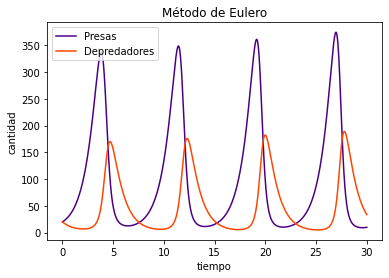

In [ ]:
plt.plot(t, x, color = 'indigo', label= 'Presas')
plt.plot(t, y, color = 'orangered', label='Depredadores')
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title('Método de Eulero')
plt.legend(loc='best')
plt.show()

In [ ]:
print('Al tiempo t = ', tf)
print('El número de presas es: ', x[nt])
print('El número de depredadores es: ', y[nt])

Al tiempo t =  30.0
El número de presas es:  9.85394744856309
El número de depredadores es:  33.67182811230629


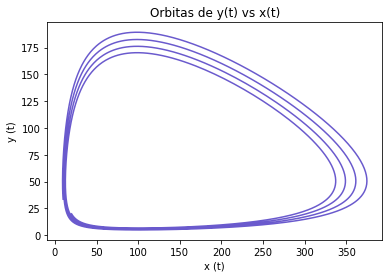

In [ ]:
plt.plot(x, y, color = 'slateblue')
plt.xlabel('x (t)')
plt.ylabel('y (t)')
plt.title('Orbitas de y(t) vs x(t)')
plt.show()

###**Método odeint**

In [ ]:
from scipy.integrate import odeint

def dfdt(z, t):
  dxdt = a*z[0] - b*z[0] * z[1]
  dydt = -c*z[1] + d*z[0] * z[1]
  dzdt = [dxdt,dydt]
  return dzdt

# Condición inicial
z0 = [20, 20]

# Tiempo
ts = np.linspace(0, 30, 3001)

z = odeint(dfdt, z0, ts)

In [ ]:
print('Función aproximada de presas:', z[:, 0])
print('Función aproximada de depredadores:',z[:, 1])

Función aproximada de presas: [20.         20.1206817  20.24273321 ... 19.30583103 19.41851512
 19.5325122 ]
Función aproximada de depredadores: [20.         19.8407577  19.68302225 ... 20.98529158 20.81675097
 20.64979802]


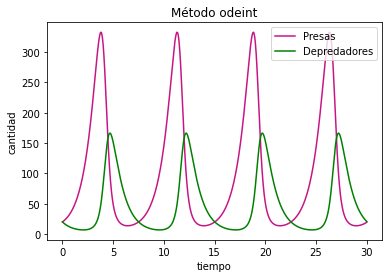

In [ ]:
plt.plot(t, z[:, 0], color = 'mediumvioletred', label= 'Presas')
plt.plot(t, z[:, 1], color = 'g', label='Depredadores')
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title('Método odeint')
plt.legend(loc='best')
plt.show()

In [ ]:
print('Al tiempo t = ', tf)
print('El número de presas es: ', z[-1, 0])
print('El número de depredadores es: ', z[-1, 1])

Al tiempo t =  30.0
El número de presas es:  19.532512204947416
El número de depredadores es:  20.64979801965686


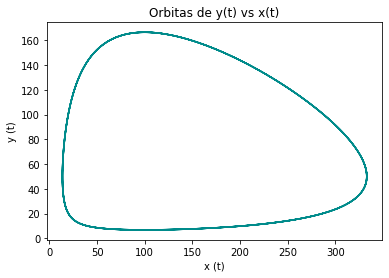

In [ ]:
plt.plot(z[:, 0], z[:, 1], color = 'darkcyan')
plt.xlabel('x (t)')
plt.ylabel('y (t)')
plt.title('Orbitas de y(t) vs x(t)')
plt.show()

###**Comparación entre los dos métodos**

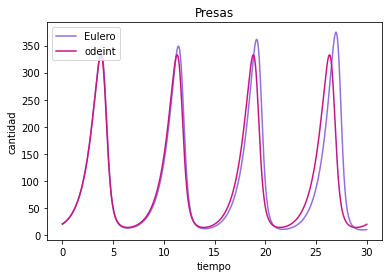

In [ ]:
plt.plot(t, x, color = 'mediumpurple', label= 'Eulero')
plt.plot(t, z[:, 0], color ='mediumvioletred', label= 'odeint')
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title('Presas')
plt.legend(loc='upper left')
plt.show()

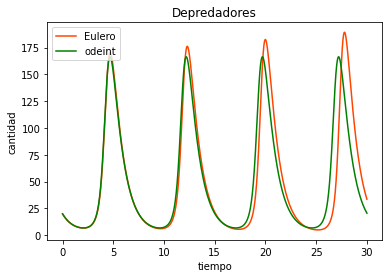

In [ ]:
plt.plot(t, y, color = 'orangered', label='Eulero')
plt.plot(t, z[:, 1], color = 'g', label='odeint')
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title('Depredadores')
plt.legend(loc='best')
plt.show()